## Inicjalizacja środowiska programistycznego

In [11]:
#Color printing
from termcolor import colored

#General data operations library
import math
import numpy as np

#The tensorflow library
import tensorflow  as tf

#Plotting libraries
import matplotlib.pyplot as plt

#Increase plots font size
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (10, 7),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

<br/><br/>
<br/><br/>

<h1 align="center">
 Uczenie maszynowe II
</h1>

<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>

<h1 align="right">
Artur Kalinowski <br>
Uniwersytet Warszawski <br>
Wydział Fizyki <br>    
</h1>

<div>
<img src="attachment:e5f5b879-541b-4444-911b-568210a7d171.png" align="left" width="800"/>
</div>

Rozwinięcie Taylora:
$$
\huge{
\begin{matrix*}[l]
f(x, a_{n}) = \\
\sum_{n=0}^{\infty} a_{n}x^{n} = \\
a_{0} + a_{1}x + a_{2}x^{2} +...
\end{matrix*}
}
$$
<br><br><br><br>
można przedstawić w postaci architektury łączącej wejście z wyjściem:

* wszystkie dane są podawane jednocześnie na wejście różnych funkcji bazowych: w tym przypadku $x^{n}$
* funkcje bazowe zwracają nowe liczby, które są sumowane z wagami: $a_{i}$
* suma jest zwracana jako wynik działania modelu

Wielomiany stopnia n nie są jednak zbyt dobrymi funkcjami bazy:

* uzyskanie dużej precyzji wymaga użycia wysokiego stopnia, a to generuje problemy ze stabilnością numeryczną
* dane wielowymiarowe powodują dodatkowe komplikacje - pojawiają się mieszane potęgi składowych danych:

$$
\huge{
x_{0}x_{1},~x_{0}^{3}x_{1}^{58},~\text{etc.}
}
$$

Rozwiązanie tego problemu wygląda następująco:

* wielowymiarowe dane redukujemy do jednej liczby, obliczając sumę ważoną z dodatkowym członem przesuwającym wartość sumy (ang. `bias`)

$$
\huge{
\sum_{i} w_{i}x_{i} + b
}
$$

* wynik sumy podajemy na wejściu do względnie prostej funkcji, która zwraca jedną wartość - **funkcji aktywacji** (ang. `activation function`):

$$
\huge{
A(\sum_{i} w_{i}x_{i} + b)
}
$$   

* funkcje aktywacji pełnią rolę bazy - różnią się między sobą. Różnica jest zwykle sparametryzowana.

$$
\huge{
A(x,  \mathbf{\theta} = \{w_{i}, b\})
}
$$

* wyjście może być traktowane jako wejście do kolejnej "rundy" - innych funkcji aktywacji

* **funkcje bazy w której rozwijamy nieznaną funkcję opisującą dane są zadane przez strukturę przepływu danych - połączenia
  między funkcjami aktywacji.** Nie znamy analitycznej postaci funkcji bazy.

<div>
<img src="attachment:e76ce2ec-504a-4ee7-9f9c-b253318e4dbf.png" align="center", width=1000/>
</div>

## Dlaczego architektura w pełni połączona działa?

# Twierdzenie o uniwersalnym aproksymatorze [Cybenko, 1989](https://link.springer.com/article/10.1007/BF02551274):

Zdefiniujmy ``neuron``, funkcję $R^{n} \rightarrow R$:
$$
\huge{
 f(\theta, x) = A(\sum_{i=1}^{N} \theta_{i} x_{i} + \theta_{0})
}
$$

gdzie `A` - to funkcja aktywacji - dowolna, nie będąca wielomianem, funkcja która spełnia warunki:

$$
\huge{
 \lim_{x\rightarrow -\infty} f(x) \rightarrow 0 \\
 \lim_{x\rightarrow +\infty} f(x) \rightarrow 1 \\
}
$$

**Twierdzenie:** Każda ciągła funkcja $R^{n} \rightarrow R$ może być przybliżona w bazie `neuronów` (= jedna warstwa neuronów).

$$
\huge{
y(x) \simeq \sum_{k} w_{k} f_{k}(\theta_{k}, x)
}
$$

Od 1989 roku udowodniono wiele wariantów twierdzenia o uniwersalnym aproksymatorze, w tym twierdzenia z innymi warunkami na funkcję aktywacji.

* w warstwach ukrytych najbardziej popularną funkcją aktywacji jest **ReLU**
* w warstwie wyjściowej zwracającej prawdopodobieństwo jest używana funkcja **sigmoid** lub **softmax** - jej znormalizowany wariant dla n>2 kategorii:
$$
  \huge{
    \sigma(\mathbf{x})_{k} = \frac{e^{\mathbf{w}_{k}\mathbf{x} + b_{k}}}{\sum_{i=0}^{n-1} e^{\mathbf{w}_{i}\mathbf{x} + b_{i}}}
  }
$$
gdzie $\mathbf{w}_{i}$, $\mathbf{b}_{i}$ to wagi odpowiadające i-tej kategorii

**Proszę:**

* stworzyć rysunek z trzema panelami w rzędzie
* na kolejnych panelach narysować wykresy funkcji aktywacji: `sigmoid`, `tanh`, `relu`
* proszę zadbać o tę samą skalę na wszystkich panelach
* wartości funkcji proszę obliczyć korzystając z funkcji w module `tf.keras.activations`:
  ```Python
  
  sigmoid = tf.keras.activations.sigmoid(x)
  tanh = tf.keras.activations.tanh(x)
  relu = tf.keras.activations.relu(x)
  ```

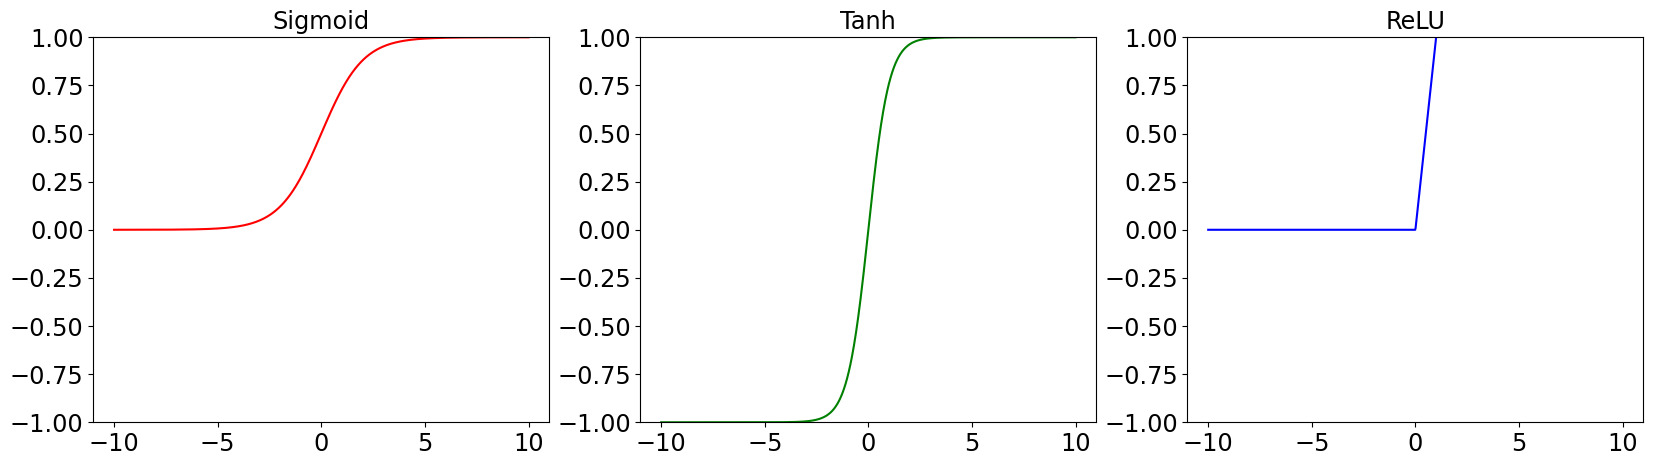

In [12]:
x = np.linspace(-10, 10, 1000)
sigmoid = tf.keras.activations.sigmoid(x)
tanh = tf.keras.activations.tanh(x)
relu = tf.keras.activations.relu(x)

fig, axis = plt.subplots(1, 3, figsize=(20, 5))
axis[0].plot(x, sigmoid, color='red')
axis[0].set_title('Sigmoid')
axis[0].set_ylim(-1,1)
axis[1].plot(x, tanh, color='green')
axis[1].set_ylim(-1,1)
axis[1].set_title('Tanh')
axis[2].plot(x, relu, color='blue')
axis[2].set_ylim(-1,1)
axis[2].set_title('ReLU')
pass

Uczenie maszynowe generalnie składa się z następujących etapów:

* **definicja** - wyrażenie zagadnienia w kontekście poszukiwania funkcji opisującej dane. Np. GPT (ten z chatGPT) określa prawdopodobieństwo następnego słowa w ciągu tekstu
* **definicja architektury** - określienie sposobu przepływu danych między wejściem a wyjściem.
  Standardowe architektury składają się z **warstw** ang. `layers`:
    * **wejściowej** - ang. `input layer`
    * **ukrytych** - ang. `hidden layers`
    * **wyjściowej** - ang. `output layer`
* **trening** - znajdowanie wartości parametrów funkcji aktywacji i wag w procesie wstecznej propagacji gradientu funkcji straty
* **testowanie** - ang. `testing, evaluation, validation` - oszacowania stopnia **generalizacji** modelu, czyli jak dobrze model się sprawuje w przypadku danych, które nie były używane do znajdowania parametrów modelu, czyli treningu

Na rynku jest wiele pakietów, które dostarczają narzędzi potrzebnych do tworzenia, trenowania i testowania modeli uczenia maszynowego. Dominujące to:

<br></br>

<a href="https://www.tensorflow.org">
<img border="0" alt="TensorFlow"
    src="attachment:a7092520-0e00-4f5d-83a2-4eb6b4fca438.png"    
    width="400" height="400" align="left">
</a>

zaawansowany pakiet do uczenia maszynowego rozwijany przez firmę Google. Definicja i trening modeli mogą być wykonane za pomocą interfejsu (Application Programming Interface, API) [Keras](https://keras.io/).
**Uwaga**: API Keras pozwala na użycie różnych środowisk wykonawczych: TensorFlow, PyTorch, JAX

<br></br>

<a href="https://pytorch.org/">
<img border="0" alt="PyTorch"
    src="attachment:9a6b4c13-fd50-4303-a4cf-7c572fe77fcb.png"
    width="400" height="400" align="left">
</a>

zaawansowany pakiet do uczenia maszynowego stworzony przez MetaAI, obecnie pod kuratelą Linux Foundation

<br></br>

<a href="https://scikit-learn.org/stable/">
<img border="0" alt="scikit-learn"
    src="attachment:114c20c2-2b0a-4cab-a0cd-cad08dc59aff.png"
    width="400" height="400" align="left">
</a>

pakiet do uczenia maszynowego rozwijany przez niezależny zespół. Zawiera wiele gotowych rozwiązań i przykładów z zakresu uczenia maszynowego i analizy danych


<img border="0" alt="ML frameworks usage"
    src="attachment:91d25b17-f0aa-4343-8f1e-ffe870fbfdd8.png">
<br>
<a href="https://www.kaggle.com/kaggle-survey-2022">
    Źródło: https://www.kaggle.com/kaggle-survey-2022
</a>

W trakcje zajęć będziemy głównie korzystali z biblioteki TensorFlow z interfejsem Keras.
Zacznijmy od stworzenia modelu, który będzie zawierał podstawowe warstwy:

**wejściową:**

```Python
input = tf.keras.Input(shape=(inputShape,), name="features")
```

**ukrytą:**,

```Python
layer = tf.keras.layers.Dense(nHiddenNeurons, activation=activation, name="layer_{}".format(iLayer))(x)
```

**wyjściową:**

```Python
outputs = tf.keras.layers.Dense(nOutputNeurons, activation=activation, name="outputs")(x)
```

Wejście z wyjściem jest połączone wewnątrz klasy `tf.keras.model`:
```Python

model = tf.keras.Model(inputs=inputs, outputs=outputs, name="DNN")
```

Wagi warstwy są dostępne poprzez pole `weights`:
```Python
layer.weights
```

**Uwaga:** obciążenie, `bias` jest podawane jako osobny element listy zwracanej przez pole `weights`

In [13]:
nInputs = 4
nHidenNeurons = 3
nOutputNeurons = 1

inputs = tf.keras.Input(shape=(nInputs,), name="features")

iLayer = 1
layer = tf.keras.layers.Dense(nHidenNeurons,
                              name="layer_{}".format(iLayer))(inputs)

outputs = tf.keras.layers.Dense(nOutputNeurons, name = "output")(layer)

model = tf.keras.Model(inputs=inputs, outputs=outputs, name="DNN")

model.summary()

print(colored("Model weights:","blue"),model.get_layer('layer_1').weights)

Model: "DNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ features (InputLayer)           │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_1 (Dense)                 │ (None, 3)              │            15 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19 (76.00 B)

 Trainable params: 19 (76.00 B)

 Non-trainable params: 0 (0.00 B)

Model weights: [<KerasVariable shape=(4, 3), dtype=float32, path=layer_1/kernel>, <KerasVariable shape=(3,), dtype=float32, path=layer_1/bias>]


**Proszę:**

* obliczyć samodzielnie liczbę parametrów warstwy ukrytej

**Wskazówka:** każdy neuron ma oddzielną wagę dla każdej zmiennej wejściowej oraz dodatkową wagę, `bias`.

In [21]:
number_of_parameters = nHidenNeurons * (nInputs + 1)
print(colored("Number of parameters in the first layer:","blue"),number_of_parameters)
pass

Number of parameters in the first layer: 15


Małe modele można wizualizować korzystając z funkcji biblioteki Keras:

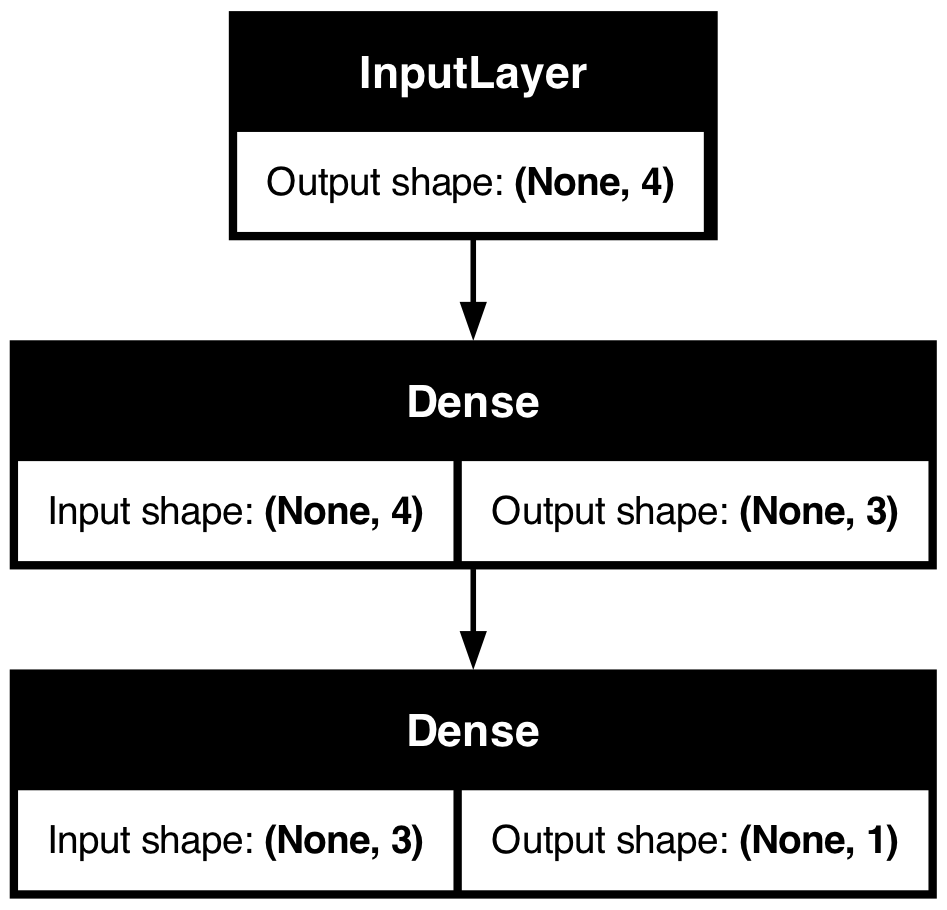

In [22]:
tf.keras.utils.plot_model(model, 'fig_png/ML_model.png', show_shapes=True)

Funkcje używane w czasie treningu:

* algorytm minimalizacyjny - `optimizer`
* funkcja straty - `loss`
* lista metryk śledzonych w czasie treningu - `metrics`

są określane przy wywołaniu metody `tf.keras.model.compile`:

In [23]:
lr = 0.001

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['MeanAbsolutePercentageError','RootMeanSquaredError'])

Pętla ucząca jest wywołana przez metodę `tf.keras.fit`, która przyjmuje wiele parametrów sterujących procesem treningu.
Konieczne są dwa:

* cechy i etykiety zbioru uczącego - `x, y`
* liczba epok - `epochs`

Metoda `fit` zwraca obiekt zawierający dane na temat historii uczenia - wartości metryk i funkcji straty w kolejnych epokach:
```Python
history = model.fit(x=x, y=y,  epochs=nEpochs, verbose=2)
print(history.history)
```

**Proszę:**

Skonstruować model uczenia maszynowego, który będzie obliczał kwadrat długości wektora w metryce Minkowskiego o sygnaturze `(+,-,-,-)`

* model powinen być tak zbudowany by można było interpretować jego wagi
* model przyjmuje kwadratry współrzędnych
* jako danych uczących proszę użyć danych syntetycznych na czterowymiarowej kostce o boku `[0,1]`
* kod powinien być podzielony na funkcje:
    * `getFeatures(nPoints)` generacja ccech
    * `getModel(nHidenNeurons, nOutputNeurons, lr)` - tworzenie modelu
    * `plotTrainHistory(history)` - rysowanie funkcji straty w kolejnych epokach

In [76]:
def getFeatures(nPoints):
    return tf.random.uniform((nPoints,4), 0, 1)

def plotTrainHistroy(histroy):
    fig, axis = plt.subplots(1, 2, figsize=(20, 5))
    axis[0].plot(histroy.history['loss'], label='loss')
    #axis[0].plot(histroy.history['MeanAbsolutePercentageError'], label='MeanAbsolutePercentageError')
    #axis[0].plot(histroy.history['RootMeanSquaredError'], label='RootMeanSquaredError')
    axis[0].set_xlabel('Epoch')
    axis[0].set_ylabel('Error')
    axis[0].legend()
    axis[1].plot(histroy.history['loss'], label='loss')
    axis[1].set_yscale('log')
    axis[1].set_xlabel('Epoch')
    axis[1].set_ylabel('Error')
    axis[1].legend()
    pass

def getModel(nInputs, nHidenNeurons, nOutputNeurons, lr):
    inputs = tf.keras.Input(shape=(nInputs,), name="features")
    iLayer = 1
    layer = tf.keras.layers.Dense(nHidenNeurons,
                                  name="layer_{}".format(iLayer))(inputs)
    outputs = tf.keras.layers.Dense(nOutputNeurons, name = "output")(layer)
    model = tf.keras.Model(inputs=inputs, outputs=outputs, name="DNN")
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                  loss=tf.keras.losses.MeanSquaredError(),
                  metrics=['MeanAbsolutePercentageError','RootMeanSquaredError'])
    return model


pass

**Proszę:**

* przeprowadzić trening modelu
* wypisać na ekran wartości funkcji straty i metryk dla zadanego zbioru:
  <br></br>
  ```Python
  model.evaluate(x,y)
  ```
  <br></br>
* wypisać na ekran wynik działania modelu dla pojedynczego przykładu:
  <br></br>
  ```Python
  model.predict([[125**2,0,0,0]])
  ```
  <br></br>
* narysować ewolucję funkcji straty w skalach liniowej i logarytmicznej
* wypisać na ekran i zinterpretować wagi modelu

2025-03-19 12:44:35.589969: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


dict_keys(['MeanAbsolutePercentageError', 'RootMeanSquaredError', 'loss'])
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - MeanAbsolutePercentageError: 1.0445e-04 - RootMeanSquaredError: 5.1506e-07 - loss: 2.6536e-13
Wartości funkcji straty i metryk:  [2.6714440663939965e-13, 0.00014844417455606163, 5.16860154675669e-07]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Wynik dizałania modleu dla pojedynczego przykładu  [[15625     0     0     0]]  to:  [[15625.015]]
Wagi modelu layer_1: 
 [[-0.95310265]
 [ 0.9531011 ]
 [ 0.9531009 ]
 [ 0.9531007 ]]
Wagi modelu output: 
 [[-1.0492059]]
layer_0 * output = 
 [[ 1.000001  ]
 [-0.9999993 ]
 [-0.9999991 ]
 [-0.99999887]]
Obciąenie layer_1 [-0.03200758]
Obciąenie output [-0.03358433]


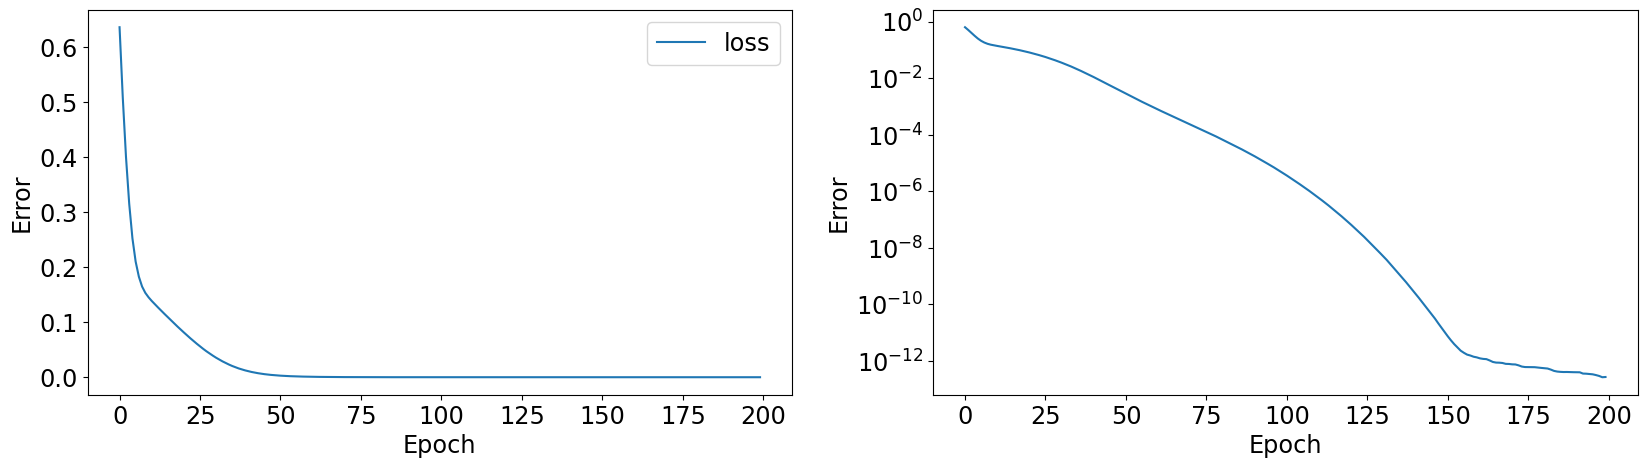

In [62]:
nPoints = 1000
inputs = getFeatures(nPoints)
#y = inputs[:,0] - inputs[:,1] - inputs[:,2] - inputs[:,3]
y = np.sum(inputs*(1,-1,-1,-1), axis=1)
nInputs = 4
nHidenNeurons = 1
nOutputNeurons = 1
lr = 0.001
nepochs = 200
model = getModel(nInputs, nHidenNeurons, nOutputNeurons, lr)
history = model.fit(inputs, y, epochs=nepochs, verbose=0)
x_test = np.array([[125**2,0,0,0]])
print(history.history.keys())
print(colored('Wartości funkcji straty i metryk: ', 'blue'), model.evaluate(inputs, y))
print(colored('Wynik dizałania modleu dla pojedynczego przykładu ', 'blue'), x_test, colored(' to: ', 'blue'), model.predict(x_test))
print(colored('Wagi modelu layer_1: \n', 'blue'), model.get_layer('layer_1').get_weights()[0])
print(colored('Wagi modelu output: \n', 'blue'), model.get_layer('output').get_weights()[0])
print(colored('layer_0 * output = \n', 'blue'), model.get_layer('layer_1').get_weights()[0] * model.get_layer('output').get_weights()[0])
print(colored('Obciąenie layer_1', 'blue'), model.get_layer('layer_1').get_weights()[1])
print(colored('Obciąenie output', 'blue'), model.get_layer('output').get_weights()[1])
plotTrainHistroy(history)
pass

Funkcja straty w końcowym etapie treningu wykazuje duże oscylacje - **zejście gradientowe skacze wokół minimum** ponieważ współczynnik uczenia mnożący gradient jest za duży. Zjawisko to można zredukować, zmniejszając współczynnik uczenia w trakcie treningu. Algorytm zmiany `lr` zadaje się w konstruktorze klasy do optymalizacji, podając funkcję zwracającą wartość `lr` dla danego kroku optymalizacyjnego zamiast stałej wartości `lr`.

In [63]:
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate,
                decay_steps=1000,
                decay_rate=0.98,
                staircase=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

print(colored("LR for step 999:","blue"),lr_schedule(step=999).numpy())
print(colored("LR for step 1000:","blue"),lr_schedule(step=1000).numpy())

LR for step 999: 0.001
LR for step 1000: 0.00098


**Proszę:**

* powtórzyć trening modelu obliczającego kwadrat długości czterowektora używając zmiennej w czasie wartości współczynnika uczenia
* parametry zmiany współczynnika uczenia proszę dobrać tak, by zlikwidować efekt oscylacji funkcji straty

2025-03-19 13:15:25.060561: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


dict_keys(['MeanAbsolutePercentageError', 'RootMeanSquaredError', 'loss'])
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - MeanAbsolutePercentageError: 100.6924 - RootMeanSquaredError: 0.4427 - loss: 0.1963
Wartości funkcji straty i metryk:  [0.18911826610565186, 94.26042938232422, 0.43487730622291565]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Wynik dizałania modleu dla pojedynczego przykładu  [[15625     0     0     0]]  to:  [[5374.261]]
Wagi modelu layer_1: 
 [[ 0.69862896]
 [-0.9050026 ]
 [ 0.09611934]
 [-0.4784162 ]]
Wagi modelu output: 
 [[0.49240628]]
layer_0 * output = 
 [[ 0.34400928]
 [-0.44562897]
 [ 0.04732976]
 [-0.23557514]]
Obciąenie layer_1 [-0.485423]
Obciąenie output [-0.64453095]


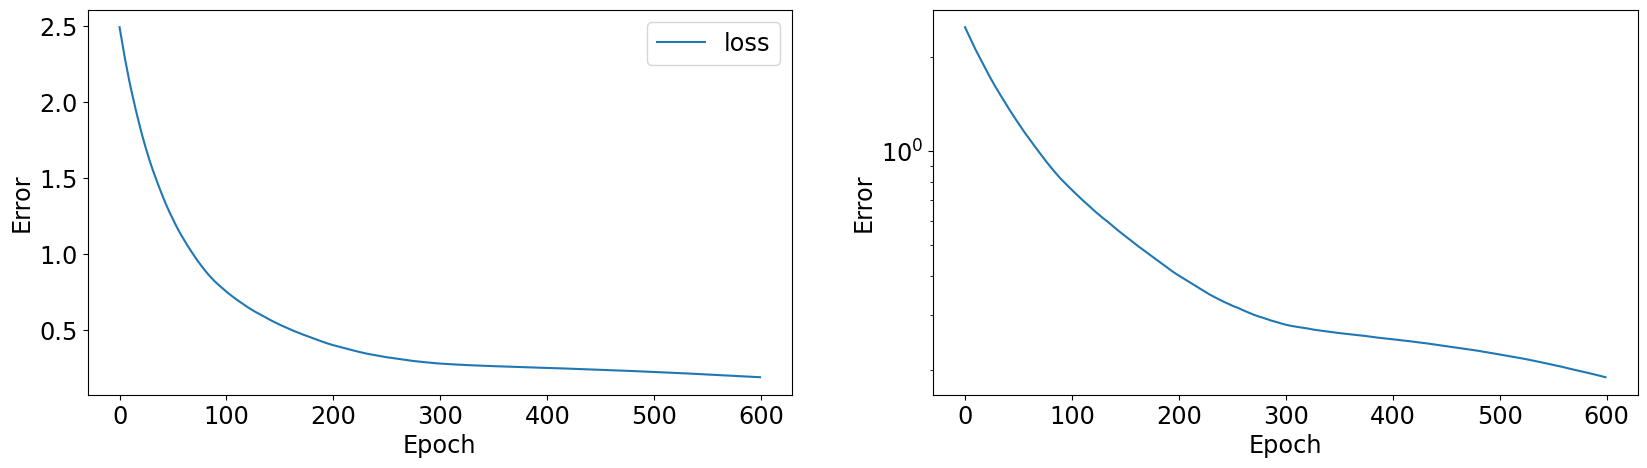

In [69]:
nPoints = 100
inputs = getFeatures(nPoints)
y = np.sum(inputs*(1,-1,-1,-1), axis=1)
nInputs = 4
nHidenNeurons = 1
nOutputNeurons = 1
nepochs = 600
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate,
                decay_steps=400,
                decay_rate=0.95,
                staircase=True)
model = getModel(nInputs, nHidenNeurons, nOutputNeurons, lr_schedule)
history = model.fit(inputs, y, epochs=nepochs, verbose=0)
x_test = np.array([[125**2,0,0,0]])
print(history.history.keys())
print(colored('Wartości funkcji straty i metryk: ', 'blue'), model.evaluate(inputs, y))
print(colored('Wynik dizałania modleu dla pojedynczego przykładu ', 'blue'), x_test, colored(' to: ', 'blue'), model.predict(x_test))
print(colored('Wagi modelu layer_1: \n', 'blue'), model.get_layer('layer_1').get_weights()[0])
print(colored('Wagi modelu output: \n', 'blue'), model.get_layer('output').get_weights()[0])
print(colored('layer_0 * output = \n', 'blue'), model.get_layer('layer_1').get_weights()[0] * model.get_layer('output').get_weights()[0])
print(colored('Obciąenie layer_1', 'blue'), model.get_layer('layer_1').get_weights()[1])
print(colored('Obciąenie output', 'blue'), model.get_layer('output').get_weights()[1])
plotTrainHistroy(history)
pass

Gradient jest obliczany dla paczek, `batches` przykładów. Domyślna krotność paczki to `32`. Rozmiarem paczki steruje parametr `batch_size`:
```Python
model.fit(x=x, y=y, epochs=nEpochs, batch_size = 128, verbose=0)
```

**Proszę:**

* przeprowadzić trening przez `100` epok z różnymi rozmiarami paczki
* jak rozmiar paczki wpływa na zbieżność treningu?

**Uwaga:** model trzeba stworzyć od nowa, inaczej będzie miał wartości wag ustalone w poprzednim treningu.

dict_keys(['MeanAbsolutePercentageError', 'RootMeanSquaredError', 'loss'])
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - MeanAbsolutePercentageError: 0.0985 - RootMeanSquaredError: 4.3707e-04 - loss: 1.9105e-07
Wartości funkcji straty i metryk:  [1.9155648089963506e-07, 0.1087372675538063, 0.00043767166789621115]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Wynik dizałania modleu dla pojedynczego przykładu  [[15625     0     0     0]]  to:  [[15637.673]]
Wagi modelu layer_1: 
 [[-0.9763526 ]
 [ 0.9752801 ]
 [ 0.97440886]
 [ 0.97523844]]
Wagi modelu output: 
 [[-1.025051]]
layer_0 * output = 
 [[ 1.0008112 ]
 [-0.9997119 ]
 [-0.99881876]
 [-0.99966913]]
Obciąenie layer_1 [-0.10697614]
Obciąenie output [-0.11100104]


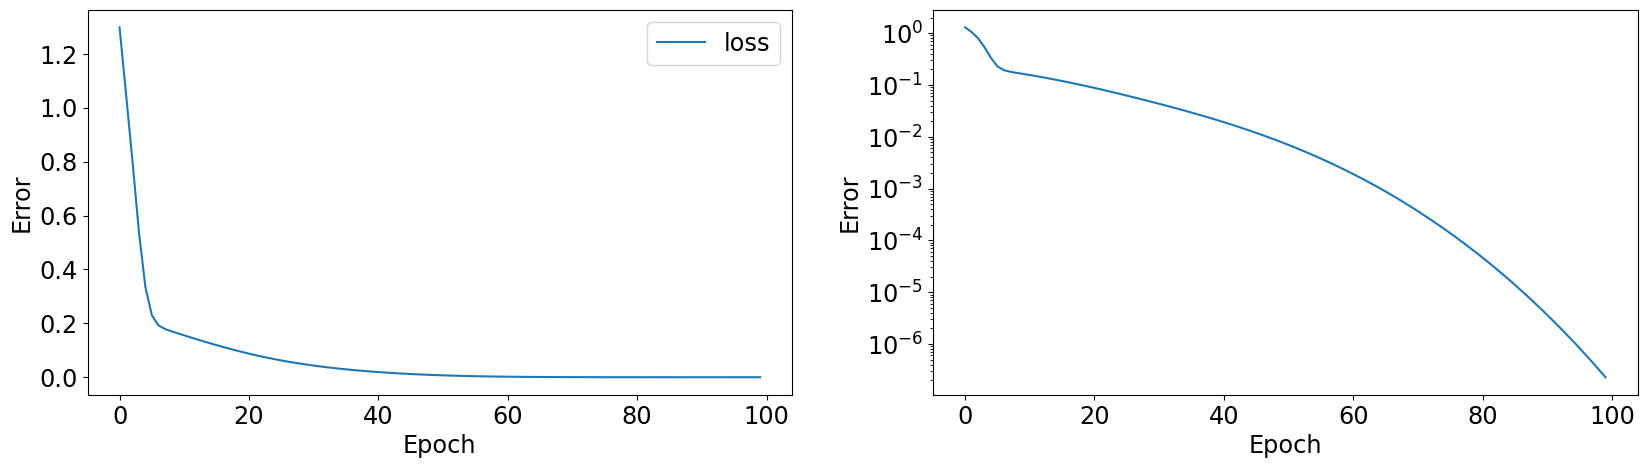

In [70]:
nPoints = 10000
inputs = getFeatures(nPoints)
y = np.sum(inputs*(1,-1,-1,-1), axis=1)
nInputs = 4
nHidenNeurons = 1
nOutputNeurons = 1
nepochs = 100
initial_learning_rate = 0.001
batch_size = 128
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate,
                decay_steps=200,
                decay_rate=0.95,
                staircase=True)
model = getModel(nInputs, nHidenNeurons, nOutputNeurons, lr_schedule)
history = model.fit(inputs, y, epochs=nepochs, batch_size=batch_size, verbose=0)
x_test = np.array([[125**2,0,0,0]])
print(history.history.keys())
print(colored('Wartości funkcji straty i metryk: ', 'blue'), model.evaluate(inputs, y))
print(colored('Wynik dizałania modleu dla pojedynczego przykładu ', 'blue'), x_test, colored(' to: ', 'blue'), model.predict(x_test))
print(colored('Wagi modelu layer_1: \n', 'blue'), model.get_layer('layer_1').get_weights()[0])
print(colored('Wagi modelu output: \n', 'blue'), model.get_layer('output').get_weights()[0])
print(colored('layer_0 * output = \n', 'blue'), model.get_layer('layer_1').get_weights()[0] * model.get_layer('output').get_weights()[0])
print(colored('Obciąenie layer_1', 'blue'), model.get_layer('layer_1').get_weights()[1])
print(colored('Obciąenie output', 'blue'), model.get_layer('output').get_weights()[1])
plotTrainHistroy(history)
pass
pass

Trening może być automatycznie zakończony wcześniej, jeśli wybrana metryka nie wykazuje poprawy. Wcześniejsze zatrzymanie treningu nosi nazwę `early stopping`.
Procedura ta jest kontrolowana przez dodatkowe funkcje, które są wywoływane w czasie treningu: `callbacks`:
```Python

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', # Nazwa metryki do monitorowania
                                            patience=3,     # Liczba epok przez które funkcja nie zwiększa się o więcej niż
                                            min_delta=1E-3  # (bezwzględny) próg różnicy
                                            verbose=1)

model.fit(x=x, y=y, epochs=nEpochs,
                    batch_size = 128,
                    verbose=0,
                    callbacks=[callback]
                   )
```

**Proszę:**

* skonfigurować funkcję `tf.keras.callbacks.EarlyStopping` tak by zatrzymała wcześniej trening modelu znajdującego kwadrat długości czterowektora.

Epoch 25: early stopping
dict_keys(['MeanAbsolutePercentageError', 'RootMeanSquaredError', 'loss'])
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - MeanAbsolutePercentageError: 0.6459 - RootMeanSquaredError: 0.0030 - loss: 8.8451e-06
Wartości funkcji straty i metryk:  [8.903232810553163e-06, 0.7401654124259949, 0.002983828540891409]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Wynik dizałania modleu dla pojedynczego przykładu  [[15625     0     0     0]]  to:  [[15497.936]]
Wagi modelu layer_1: 
 [[-1.3022609]
 [ 1.3177248]
 [ 1.3177657]
 [ 1.3176894]]
Wagi modelu output: 
 [[-0.76165015]]
layer_0 * output = 
 [[ 0.9918672]
 [-1.0036453]
 [-1.0036764]
 [-1.0036184]]
Obciąenie layer_1 [-0.06169323]
Obciąenie output [-0.0371583]


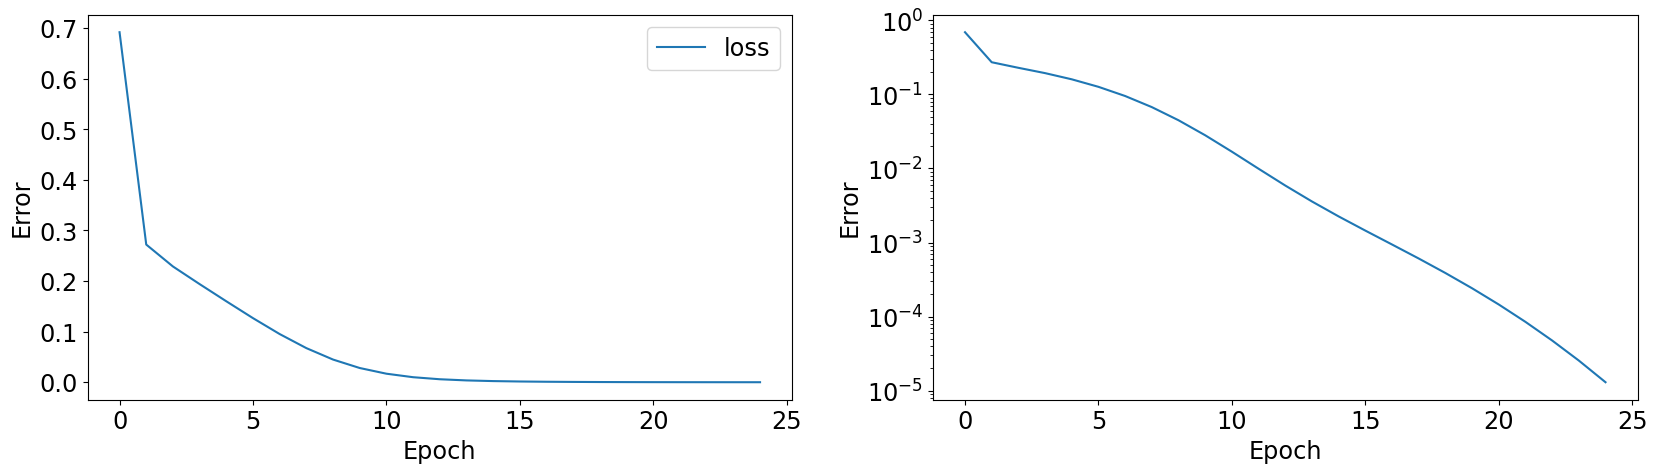

In [74]:
nPoints = 10000
inputs = getFeatures(nPoints)
y = np.sum(inputs*(1,-1,-1,-1), axis=1)
nInputs = 4
nHidenNeurons = 1
nOutputNeurons = 1
nepochs = 100
initial_learning_rate = 0.001
batch_size = 32
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate,
                decay_steps=200,
                decay_rate=0.95,
                staircase=True)
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                            patience=3,
                                            min_delta=1E-4,
                                            verbose = 1)
model = getModel(nInputs, nHidenNeurons, nOutputNeurons, lr_schedule)
history = model.fit(inputs, y, epochs=nepochs, batch_size=batch_size, verbose=0, callbacks=[callback])
x_test = np.array([[125**2,0,0,0]])
print(history.history.keys())
print(colored('Wartości funkcji straty i metryk: ', 'blue'), model.evaluate(inputs, y))
print(colored('Wynik dizałania modleu dla pojedynczego przykładu ', 'blue'), x_test, colored(' to: ', 'blue'), model.predict(x_test))
print(colored('Wagi modelu layer_1: \n', 'blue'), model.get_layer('layer_1').get_weights()[0])
print(colored('Wagi modelu output: \n', 'blue'), model.get_layer('output').get_weights()[0])
print(colored('layer_0 * output = \n', 'blue'), model.get_layer('layer_1').get_weights()[0] * model.get_layer('output').get_weights()[0])
print(colored('Obciąenie layer_1', 'blue'), model.get_layer('layer_1').get_weights()[1])
print(colored('Obciąenie output', 'blue'), model.get_layer('output').get_weights()[1])
plotTrainHistroy(history)
pass

# Zadanie domowe

Trening modelu z jednym neuronem, z liniową funkcją aktywacji, który odtworzy współczynniki trójmianu:
<br></br>
$$
\huge{
  -2 + 3x + 2x^{2}
}
$$
<br></br>

**Proszę:**

* wygenerować dane syntetyczne z parami `(x,y)`
* na wejście neuronu podawać wartości  `(x, x**2)`
* zdefiniować i wytrenować model z jednym neuronem
* narysować ewolucję funkcji straty w skalach liniowej i logarytmicznej
* narysować dane użyte do treningu oraz wynik działania modelu
* narysować histogram różnicy względnej modelu i prawdziwej wartości: `(true-model)/true`
* wypisać i zinterpretować wagi modelu porównując je ze współczynnikami dwumianu

2025-03-19 22:10:01.979642: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - MeanAbsolutePercentageError: 9.2936e-06 - RootMeanSquaredError: 6.1680e-06 - loss: 3.8144e-11
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Model weights:
layer_0: [1.1716532 1.7574799]
output: [1.7069896]
layer_0*output: [1.9999998 3.       ]
Layers bias:
layer_0: [-2.2822752]
output: [1.89582]
total bias: [[-2.]]


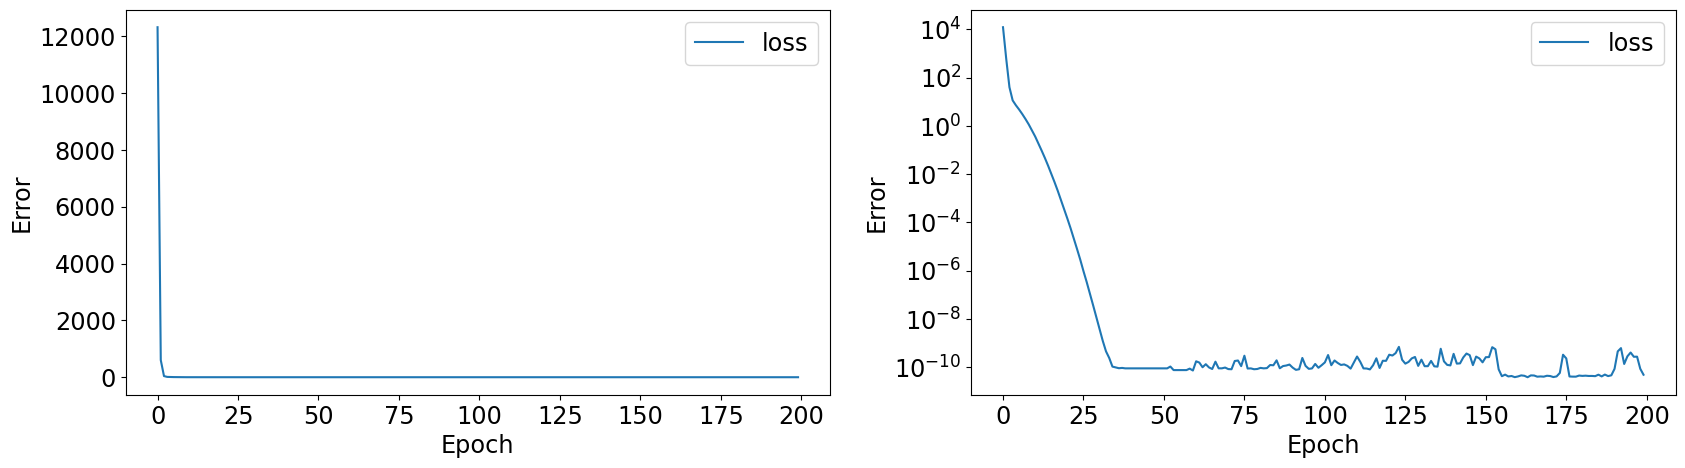

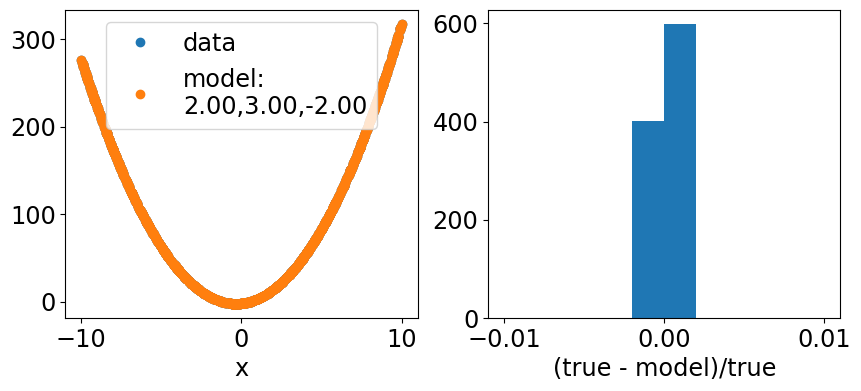

In [79]:
...rozwiązanie...
pass